In [15]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [16]:
# Parameters
d = 1
k = 1
Ns = np.linspace(10, 100, 10, dtype=int)

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
integrator = rad.integrate.MeanIntegrator(ranges, 1000)
# integrator = rad.integrate.QuadIntegrator(ranges, epsabs=1e-3, epsrel=1e-3)

# Data collection
results = np.zeros((np.size(Ns), 2))

for i, N in enumerate(Ns):
    xc = rad.gridn(ranges, N, flat=True)
    delta = 4 * (b - a) / N

    # Solve for approximate solution
    solver = rad.solve.HelmholtzSolver(integrator, phi, delta, *xc)
    approx = solver.solve(f)
    error = rad.error(exact, approx, integrator)
    cond = solver.cond()
    
    results[i,0] = error 
    results[i, 1] = solver.cond()
    
    print("N:", N)
    print("  Delta:", delta)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", solver.cond())

N: 10
  Delta: 0.4
  L2 Relative Error: 0.006687014391729655
  Condition Number: 216.2660116036109
N: 20
  Delta: 0.2
  L2 Relative Error: 0.10535026084607435
  Condition Number: 466.9213669196329
N: 30
  Delta: 0.13333333333333333
  L2 Relative Error: 0.186949721346895
  Condition Number: 576.0632587448955
N: 40
  Delta: 0.1
  L2 Relative Error: 0.25822466170288166
  Condition Number: 640.6505408265593
N: 50
  Delta: 0.08
  L2 Relative Error: 0.3214457661230654
  Condition Number: 710.8625670418621
N: 60
  Delta: 0.06666666666666667
  L2 Relative Error: 0.37785741159550235
  Condition Number: 845.1078561804901
N: 70
  Delta: 0.05714285714285714
  L2 Relative Error: 0.4282038540047929
  Condition Number: 1004.724023746491
N: 80
  Delta: 0.05
  L2 Relative Error: 0.47320290173269713
  Condition Number: 1172.005643478322
N: 90
  Delta: 0.044444444444444446
  L2 Relative Error: 0.5134036245606539
  Condition Number: 1342.7209890343358
N: 100
  Delta: 0.04
  L2 Relative Error: 0.5495139161

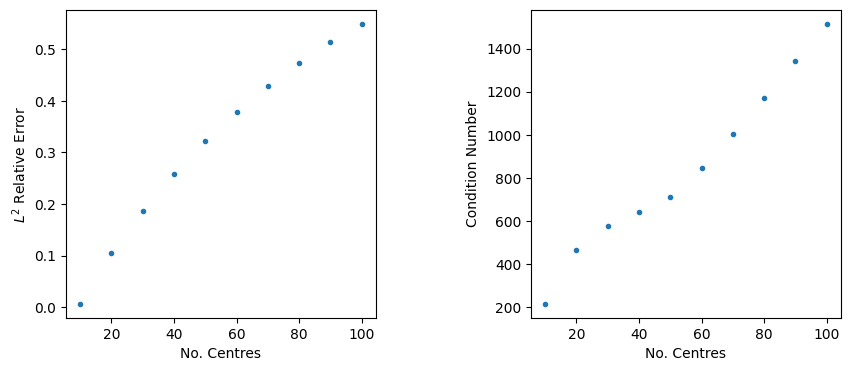

In [17]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("No. Centres")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].plot(Ns, results[:, 0], '.')

axs[1].set_xlabel("No. Centres")
axs[1].set_ylabel("Condition Number")
axs[1].plot(Ns, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()